In [1]:
import numpy as np
from lab_mf_toolbox.Multifractal_tools_box_Python_HMCo_ENPC_v_0_93 import K_q, spectral_analysis
from parsivel.read_write import pars_read_from_pickle
from multifractal_analysis.general import closest_power_of_2, slice_power_of_2
from multifractal_analysis.double_trace_moment import get_um_params_dtm
from multifractal_analysis.spectral_analysis import get_beta_and_h
from pandas import DataFrame
from pathlib import Path
from matplotlib import pyplot as plt
data_folder = Path("/home/debian-mmss/stage_project/data/saved_events/pars_events")

In [2]:
##function for finding nearest power of 2
def floor_log(num, base):
    if num < 0:
        raise ValueError("Non-negative number only.")
    if num == 0:
        return 0
    return base ** int(np.log(num, base))

<Figure size 640x480 with 0 Axes>

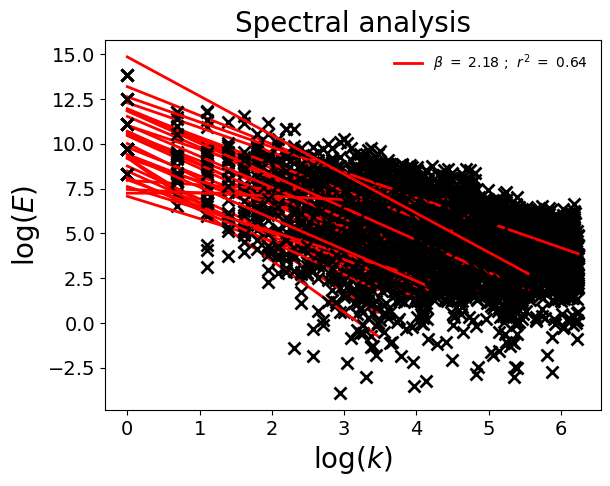

In [3]:
results = []
for file in data_folder.iterdir():
    pars_event = pars_read_from_pickle(file)
    R_data_all = pars_event.rain_rate
    N_org = len(R_data_all)
    edata = R_data_all
    data_name = "first"
    N = closest_power_of_2(edata.size)
    edata = np.nan_to_num(R_data_all)
    # N fitting with data - N with max cumulative value
    ##script that reshapes data to power of 2 based on maximum cumulative rainfall rate
    data = slice_power_of_2(edata)
    ###changing nan (not a number) to zero
    data = np.nan_to_num(data)

    ##Normailizing data
    data = data / np.nanmean(data)
    data = data.reshape((-1,1))

    ##TM analysis
    dim = 1
    data_file_name = ""
    plot_index = 30

    plt.figure(250)
    k_range = []
    bet1, bet2, bet3, x_spec, y_spec = spectral_analysis(
        data, data_file_name, k_range, dim, plot_index
    )

    # H with fluctuations
    alpha_DTM, C1_DTM = get_um_params_dtm(data.flatten(), 1.5)
    k_2 = K_q(np.array([2]), alpha_DTM, C1_DTM, 0)
    H_1 = (0.5 * (bet1 - 1 + k_2))[0]

    # My code
    mybeta, myH = get_beta_and_h(data.flatten())
    results.append((file.name, bet1, H_1, mybeta, myH))
    # break
results = DataFrame(results, columns=["name", "beta_A", "H_A","beta_M", "H_M"])

In [4]:
results.set_index("name")

,beta_A,H_A,beta_M,H_M
name,,,,
event16.obj,1.762397,0.560986,1.762397,0.560986
event10.obj,2.487243,0.872894,2.487243,0.872894
event08.obj,1.825858,0.495692,1.825858,0.495692
event30.obj,1.973580,0.606226,1.973580,0.606226
event27.obj,1.548767,0.383088,1.548767,0.383088
event13.obj,1.819922,0.582854,1.819922,0.582854
event20.obj,1.565827,0.520643,1.565827,0.520643
event24.obj,2.871591,1.042604,2.871591,1.042604
event25.obj,1.663228,0.429801,1.663228,0.429801
